## P6 Classification automatique des biens de consommation

## Partie 1: Classification des images

In [100]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [101]:
textdf=pd.read_csv('/Users/riina//Downloads/flipkart_com-ecommerce_sample_1050.csv')

In [102]:
textdf

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [103]:
textdf2=textdf.copy()

In [104]:
textdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [105]:
textdf2['product_category_tree'] = textdf2['product_category_tree'].astype('string')

In [106]:
textdf2[['category0', 'category1','category2']] = textdf2['product_category_tree'].str.split('>>', 2, expand=True)

In [107]:
textdf2["category0"]= textdf2["category0"].str[2:]

In [108]:
textdf2["category0"] = textdf2["category0"].str[:-1]

In [109]:
textdf2

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category0,category1,category2
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains >> Elegance Polyester Multicolor Abs...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Sathiyas Baby Bath Towels...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Eurospa Baby Bath Towels ...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets >> SANTOSH ROYAL FASHION Bedsheets ...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets >> Jaipur Print Bedsheets >> Jaipur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Oren Empower Stickers""]"
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Wallmantra Stickers""]"
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.co

In [110]:
testdf2=textdf2.copy()

In [111]:
testdf2.groupby('category1').count()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category0,category2
category1,,,,,,,,,,,,,,,,,
Baby & Kids Gifts,15,15,15,15,15,15,15,15,15,15,15,15,15,11,15,15,15
Baby Bath & Skin,14,14,14,14,14,14,13,13,14,14,14,14,14,14,14,14,14
Baby Bedding,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Baby Grooming,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4
Bar & Glassware,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tableware & Cutlery,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Tidy Home Furnishing,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Wall Decor & Clocks,22,22,22,22,22,22,22,22,22,22,22,22,22,20,22,22,22


In [112]:
testdf2.groupby('category0').count()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category1,category2
category0,,,,,,,,,,,,,,,,,
Baby Care,150,150,150,150,150,150,149,149,150,150,150,150,150,134,150,150,150
Beauty and Personal Care,150,150,150,150,150,150,150,150,150,150,150,150,150,41,150,150,150
Computers,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Home Decor & Festive Needs,150,150,150,150,150,150,150,150,150,150,150,150,150,148,149,150,149
Home Furnishing,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,148
Kitchen & Dining,150,150,150,150,150,150,150,150,150,150,150,150,150,79,150,150,150
Watches,150,150,150,150,150,150,150,150,150,150,150,150,150,10,150,150,150


In [113]:
testdf= textdf2[["uniq_id","category0","category1"]]

In [114]:
testdf

,uniq_id,category0,category1
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,Bed Linen
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Baby Care,Baby & Kids Gifts
1046,fd6cbcc22efb6b761bd564c28928483c,Baby Care,Baby & Kids Gifts
1047,5912e037d12774bb73a2048f35a00009,Baby Care,Baby & Kids Gifts
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Baby Care,Baby & Kids Gifts


In [115]:
testdf=testdf.set_index('uniq_id') 

In [116]:
dftest=testdf.groupby('category0')['category1'].value_counts()

In [117]:
dftest

category0         category1                
Baby Care          Infant Wear                  84
                   Baby & Kids Gifts            15
                   Baby Bedding                 15
                   Baby Bath & Skin             14
                   Feeding & Nursing             8
                                              ... 
Kitchen & Dining   Dinnerware & Crockery         1
                   Housekeeping & Laundry        1
                   Pressure Cookers & Pans       1
Watches            Wrist Watches               149
                   Clocks                        1
Name: category1, Length: 63, dtype: int64

In [118]:
dftest=testdf.groupby(['category0', 'category1']).size().reset_index(name='counts')

In [119]:
dftest

,category0,category1,counts
0,Baby Care,Baby & Kids Gifts,15
1,Baby Care,Baby Bath & Skin,14
2,Baby Care,Baby Bedding,15
3,Baby Care,Baby Grooming,4
4,Baby Care,Diapering & Potty Training,7
...,...,...,...
58,Kitchen & Dining,Lighting,7
59,Kitchen & Dining,Pressure Cookers & Pans,1
60,Kitchen & Dining,Tableware & Cutlery,3
61,Watches,Clocks,1


In [120]:
testdf= dftest[["counts","category0","category1"]]

In [121]:
labels=list(testdf["category0"])

In [122]:
lab=np.unique(labels)
lab

array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing',
       'Kitchen & Dining', 'Watches'], dtype='<U26')

[None, Text(0.5, 1.0, 'Categories')]

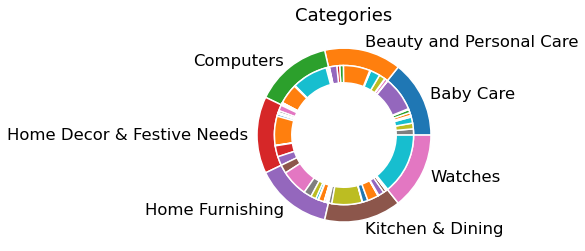

In [123]:
size = 0.2
fig, ax = plt.subplots()

ax.pie(testdf.groupby('category0')['counts'].sum(), radius=1, labels=lab,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(testdf['counts'], radius=1-size, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Categories')

In [124]:
textdf3 = textdf2[["description"]]

In [125]:
df = textdf2[["description","category0","category1"]]

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1050 non-null   object
 1   category0    1050 non-null   string
 2   category1    1050 non-null   string
dtypes: object(1), string(2)
memory usage: 24.7+ KB


In [645]:
import re

df['description_processed'] = df['description'].map(lambda x: re.sub('[^a-z\s]+', ' ', x,flags=re.IGNORECASE))

In [646]:
df['description_processed'] = df['description_processed'].map(lambda x: x.strip())

In [647]:
df['description_processed'] = df['description_processed'].map(lambda x: x.lower())

In [648]:
df['description_processed'] = df['description_processed'].map(lambda x: re.sub('(\s+)', ' ', x))

In [649]:
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specifications of sathiyas cotton bath towel b...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key features of eurospa cotton terry face towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key features of santosh royal fashion cotton p...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key features of jaipur print cotton floral kin...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack of...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigmented polyvinyl f...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker fo...


In [650]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/riina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/riina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [651]:
def lemmatize_string(str_arg):
    
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    tokens = tokenizer.tokenize(str_arg.lower())
    tokens = [lemmatizer.lemmatize(
                        lemmatizer.lemmatize(
                            lemmatizer.lemmatize(w,'n'),'a'),'v') for w in tokens]
    lemmatized_string = ' '.join(tokens)
    return lemmatized_string

In [652]:
df['description_processed']= df['description_processed'].apply(lemmatize_string)

In [653]:
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature of elegance polyester multicolor a...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification of sathiyas cotton bath towel ba...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature of eurospa cotton terry face towel...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature of santosh royal fashion cotton pr...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature of jaipur print cotton floral king...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack of...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker fo...


In [654]:
def remove_stopwords(str_arg, stopwords_list):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(str_arg.lower())
    cleaned_tokens = [x for x in tokens if x not in stopwords_list]
    cleaned_string = ' '.join(cleaned_tokens)
    return cleaned_string

In [655]:
stopwords_list = nltk.corpus.stopwords.words('english')
df['description_processed']= df['description_processed'].apply(lambda x : remove_stopwords(x, stopwords_list))
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...


In [656]:
baby= df[df['category0']=='Baby Care']
beauty= df[df['category0']=='Beauty and Personal Care']
computers= df[df['category0']=='Computers']
decor= df[df['category0']=='Home Decor & Festive Needs']
home= df[df['category0']=='Home Furnishing']
kitchen= df[df['category0']=='Kitchen & Dining']
watches= df[df['category0']=='Watches']

## World clouds 

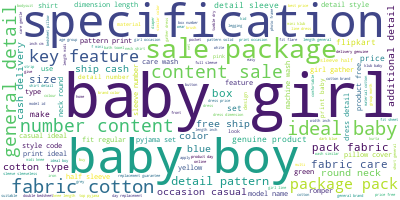

In [657]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
blong_string = ','.join(list(baby['description_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(blong_string)
# Visualize the word cloud
wordcloud.to_image()

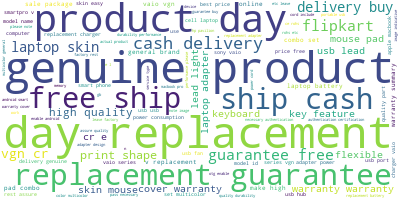

In [658]:
clong_string = ','.join(list(computers['description_processed'].values))
wordcloud.generate(clong_string)
wordcloud.to_image()

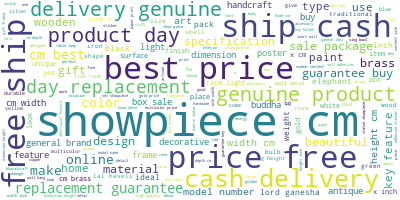

In [659]:
dlong_string = ','.join(list(decor['description_processed'].values))
wordcloud.generate(dlong_string)
wordcloud.to_image()

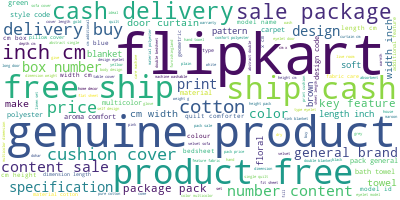

In [660]:
hlong_string = ','.join(list(home['description_processed'].values))
wordcloud.generate(hlong_string)
wordcloud.to_image()

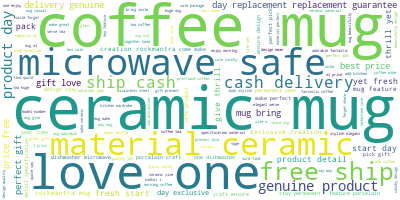

In [661]:
klong_string = ','.join(list(kitchen['description_processed'].values))
wordcloud.generate(klong_string)
wordcloud.to_image()

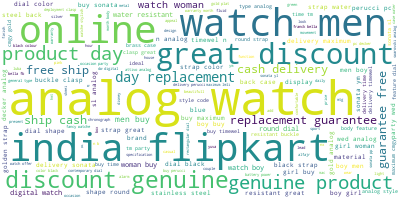

In [662]:
wlong_string = ','.join(list(watches['description_processed'].values))
wordcloud.generate(wlong_string)
wordcloud.to_image()

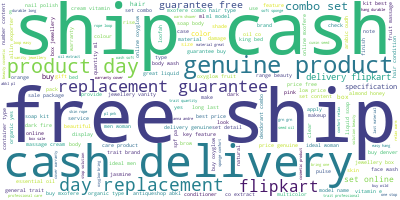

In [663]:
belong_string = ','.join(list(beauty['description_processed'].values))
wordcloud.generate(belong_string)
wordcloud.to_image()

In [664]:
textdf3=df.copy()

In [665]:
df.to_csv('textfinaldf.csv')

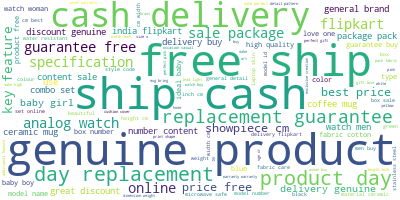

In [666]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['description_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [667]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
all_words = tokenizer.tokenize(' '.join(df['description']))

# Display number of words
print('Before cleaning')
print('Number of words: {}'.format(len(all_words)))

# Display number of unique word
print('Number of unique words: {}'.format(len(set(all_words))))

Before cleaning
Number of words: 81563
Number of unique words: 7670


In [668]:
# Same after cleaning
all_words_cleaned = tokenizer.tokenize(' '.join(df['description_processed']))

# Display number of words
print('After cleaning')
print('Number of words: {}'.format(len(all_words_cleaned)))
print('Number of unique words: {}'.format(len(set(all_words_cleaned))))

After cleaning
Number of words: 56972
Number of unique words: 4294


In [669]:
from sklearn import manifold, decomposition
def pca99(X):
    '''function reduce dimensions using t-SNE PCA keeping 99% of variance, returns np array and df '''
    
    print('dim before PCA : ', X.shape)
    pca = decomposition.PCA(n_components=0.99)
    X_pca = pca.fit_transform(X)
    print('dim after PCA : ', X_pca.shape)
    df_pca = pd.DataFrame(X_pca)
    return X_pca, df_pca


def tsne(X, n):
    '''function to reduce dimensions using t-SNE with n compotents, returns np array and df'''
    t = time.time()
    tsne = manifold.TSNE(n_components=n,
                         perplexity=30,
                         n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(X)

    columns = []
    for i in range(1, n+1):
        columns.append('tsne'+str(i))
    df_tsne = pd.DataFrame(X_tsne, columns=columns)

    d = time.time() - t
    print('dim after t-SNE : ', X_tsne.shape)
    print('timing : ', '%15.2f' % d, 's')
    return X_tsne, df_tsne

In [670]:
def get_clusters(X, n) : 
    from sklearn import cluster
    cls = cluster.KMeans(n_clusters=n, random_state=0)
    cls.fit(X)
    labels = cls.labels_
    centers = pd.DataFrame(cls.cluster_centers_)
    return labels, centers

In [671]:
def conf_mat_transform(conf_mat) :
    '''function to re-assign clusters by maximizing the diagonal of the confusion matrix'''

    # Inverse the number of items per categories (in order to use following function)
    conf_mat_temp = 1 /(conf_mat + 0.001)
    
    # apply function to get the combination of columns to minimize the diagonal 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    # transform matrix according to new columns combination
    conf_mat_transform = conf_mat[:, col_ind]
    
    # reverse liste of column index
    corresp = col_ind.tolist()
    
    return corresp, conf_mat_transform

In [672]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,  Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [673]:
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...


In [674]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
X_bow = vect.fit_transform(df['description_processed']) 
df_bow = pd.DataFrame(X_bow.toarray(), columns = vect.get_feature_names(), index = df.index)
df_bow.shape
df_bow['category0']= df['category0']
df_bow_by_cat = df_bow.groupby(['category0'])

In [675]:
# general most common words 
most_common_words = df_bow.drop(columns='category0')\
                    .T.sum(axis = 1)\
                    .sort_values(ascending = False)\
                    .head(50).index.tolist()
list1 = most_common_words[:25]
list2 = most_common_words[26:]

In [676]:
# Set colors for plots
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]

(0.0, 900.0)

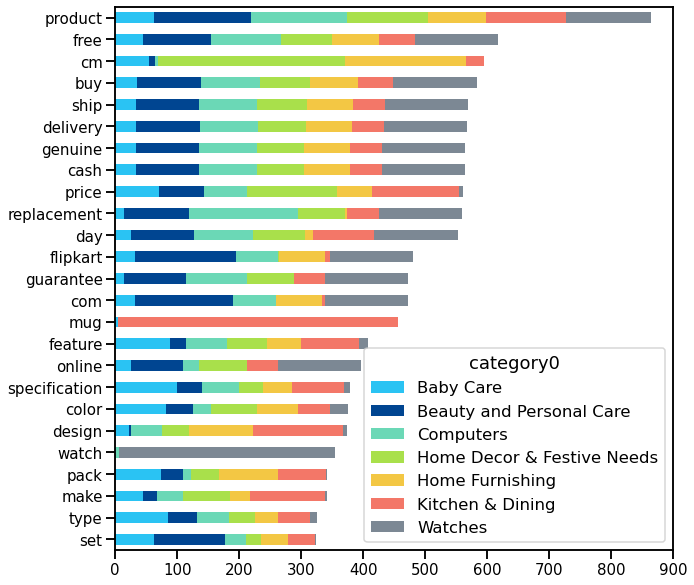

In [677]:
df16 = df_bow_by_cat.agg('sum')[list1[::-1]]
ax = df16.T.plot(kind = 'barh', stacked=True, color = colors, figsize = (10,10), fontsize = 15)
ax.set_xlim(0,900)

(0.0, 900.0)

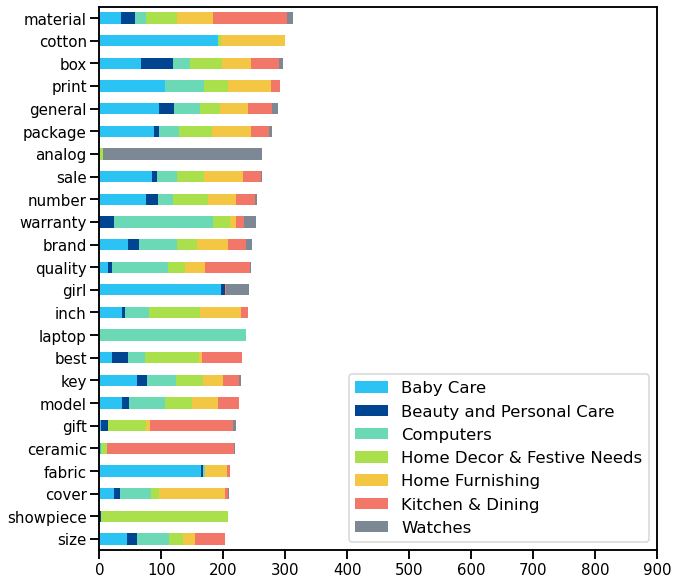

In [678]:
df16= df_bow_by_cat.agg('sum')[list2[::-1]]
ax = df16.T.plot(kind = 'barh', stacked=True, color = colors, figsize = (10,10), 
               fontsize = 15)
ax.legend(loc = 4)
ax.set_xlim(0,900)

## BOW

In [679]:
X = df['description_processed']

In [680]:
# create pipeline
pca = decomposition.PCA(n_components=0.99, svd_solver='full')
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++', n_init=10, max_iter=300) # default
#kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)

pipeline = Pipeline([('vect', CountVectorizer(stop_words = 'english', 
                                              ngram_range = (1, 1), max_df= 0.65, min_df = 0)),
                     ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', pca),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans) ])

In [681]:
dict_cat = {'home furnishing': 'home','beauty and personal care': 'beauty', 'computers': 'computers', 'home decor festive needs': 'decor',
            'baby care': 'baby','kitchen dining': 'kitchen','watches': 'watches'}
categories = list(dict_cat.values())

In [682]:
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...


In [683]:
df.category0 = pd.Categorical(df.category0)

In [684]:
df['code'] = df.category0.cat.codes

In [685]:
model = pipeline.fit(X)
X_pred = pipeline.transform(X)

In [412]:
y_true = df['code']
y_pred = pd.Series(model['kmeans'].labels_)

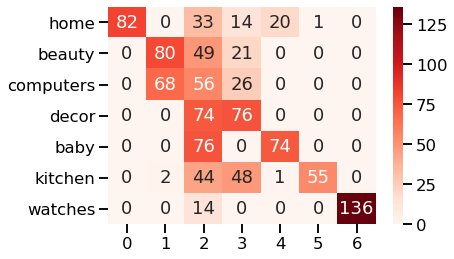

In [413]:
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [414]:
# ARI
ARI_BOW = metrics.adjusted_rand_score(y_true, y_pred_transform)
print(ARI_BOW)

0.28034314033947594


In [415]:
#save labels for plot
LABELS_BOW = y_pred_transform

## LDA

In [424]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df.description_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'curtain', 'enhance', 'look', 'interior', 'curtain', 'make', 'high', 'quality']


In [425]:
import gensim.corpora as corpora
# Create Dictionary
# storing the extracted tokens into the dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 11), (21, 3), (22, 1), (23, 5), (24, 2), (25, 1), (26, 4), (27, 2), (28, 1), (29, 1)]


In [426]:
my_dictionary = corpora.Dictionary(data_words)
print(my_dictionary)

Dictionary(4274 unique tokens: ['abstract', 'amount', 'ant', 'anti', 'apart']...)


In [427]:
my_dictionary.save('/Users/riina//Downloads/my_dictionary.dict')

In [428]:
load_dict = corpora.Dictionary.load('/Users/riina//Downloads/my_dictionary.dict')

In [429]:
from gensim.test.utils import get_tmpfile
tmp_fname = get_tmpfile("dictionary")
my_dictionary.save_as_text(tmp_fname)

In [430]:
load_dict = corpora.Dictionary.load_from_text(tmp_fname)

In [431]:
BoW_corpus =[my_dictionary.doc2bow(doc, allow_update = True) for doc in data_words]

In [432]:
from gensim.corpora import MmCorpus
from gensim.test.utils import get_tmpfile
 
output_fname = get_tmpfile("BoW_corpus.mm")
 
# save corpus to disk
MmCorpus.serialize(output_fname, BoW_corpus)
 
# load corpus
load_corpus = MmCorpus(output_fname)

In [433]:
from pprint import pprint

# number of topics
num_topics = 7

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"product" + 0.021*"free" + 0.020*"genuine" + 0.020*"cash" + '
  '0.019*"ship" + 0.019*"buy" + 0.019*"delivery" + 0.017*"replacement" + '
  '0.017*"day" + 0.016*"guarantee"'),
 (1,
  '0.012*"warranty" + 0.012*"cm" + 0.012*"skin" + 0.012*"price" + '
  '0.010*"product" + 0.009*"inch" + 0.008*"color" + 0.008*"laptop" + '
  '0.007*"replacement" + 0.007*"box"'),
 (2,
  '0.014*"mug" + 0.012*"baby" + 0.011*"coffee" + 0.009*"set" + 0.009*"print" + '
  '0.009*"pack" + 0.009*"price" + 0.009*"make" + 0.008*"girl" + 0.008*"one"'),
 (3,
  '0.015*"mug" + 0.013*"cm" + 0.013*"baby" + 0.011*"color" + 0.009*"design" + '
  '0.009*"specification" + 0.008*"fabric" + 0.008*"pack" + 0.008*"girl" + '
  '0.008*"cotton"'),
 (4,
  '0.015*"product" + 0.013*"watch" + 0.012*"day" + 0.012*"analog" + '
  '0.011*"flipkart" + 0.010*"com" + 0.010*"replacement" + 0.010*"buy" + '
  '0.009*"set" + 0.009*"design"'),
 (5,
  '0.026*"product" + 0.019*"delivery" + 0.019*"free" + 0.019*"ship" + '
  '0.019*"buy" + 0.

In [434]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()


In [435]:
LDAvis_data_filepath = os.path.join('/Users/riina//Downloads/my_dictionary.dict'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/Users/riina//Downloads/my_dictionary.dict'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.069128  0.054794       1        1  17.943484
1      0.017060 -0.005539       2        1  17.332721
5     -0.060172 -0.011275       3        1  16.012633
2      0.089365 -0.061275       4        1  13.271825
4     -0.040829 -0.033439       5        1  12.511205
0     -0.088342  0.010218       6        1  12.378705
6      0.013789  0.046517       7        1  10.549428, topic_info=            Term        Freq       Total Category  logprob  loglift
210      genuine  441.000000  441.000000  Default  30.0000  30.0000
217         ship  445.000000  445.000000  Default  29.0000  29.0000
206     delivery  444.000000  444.000000  Default  28.0000  28.0000
204          com  360.000000  360.000000  Default  27.0000  27.0000
203         cash  445.000000  445.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
147      product   38.819463  715.349025   Topic7  -5.0097  -0.6648
66         price   33.231084  509.691251   Topic7  -5.1651  -0.4812
667          mug   29.294913  430.247681   Topic7  -5.2912  -0.4378
216  replacement   29.653339  465.936715   Topic7  -5.2790  -0.5054
205          day   28.921809  455.179591   Topic7  -5.3040  -0.5070

[592 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3279      1  0.112807      abkl
3279      4  0.789649      abkl
3279      5  0.112807      abkl
0         1  0.094817  abstract
0         2  0.047409  abstract
...     ...       ...       ...
1419      3  0.153545       yet
1419      4  0.065805       yet
1419      5  0.438701       yet
1419      6  0.109675       yet
1419      7  0.087740       yet

[1578 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 6, 3, 5, 1, 7])

## TF IDF

In [436]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,  Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [437]:
df.category0 = pd.Categorical(df.category0)
df['code'] = df.category0.cat.codes

In [438]:
df['code'] = df.category0.cat.codes

## TFIDF

In [439]:
X = df['description_processed']
y_true = df['code']

In [440]:
# create pipeline (updated with best params from gridsearch below)
vectorizer = CountVectorizer(stop_words = 'english', 
    max_df=0.5, min_df=0, ngram_range=(1, 1), max_features=3000)

kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100, init='k-means++')

pipeline = Pipeline([('vect', vectorizer),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('to_array', FunctionTransformer(
                         lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', decomposition.PCA(n_components=0.99, svd_solver='full')),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans)])

In [441]:
# gridsearch
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

# make scorer
score = make_scorer(metrics.adjusted_rand_score)

# Set grid search params
grid_params = [{'vect__max_df': (0.5, 0.7, 0.9),
                'vect__min_df': (0, 0.1, 0.3),
                'vect__ngram_range': ((1, 1), (1, 2)),
                'vect__max_features': (None, 1000, 3000),
                'kmeans__random_state': (0, 20, 40, 60),
                'kmeans__init': ('k-means++', 'random'),
                'kmeans__max_iter': [100, 120, 150]
                }]

# Construct grid search
gs_TFIDF = GridSearchCV(estimator=pipeline,
                        param_grid=grid_params,
                        scoring=score,
                        cv=[(slice(None), slice(None))])

gs_TFIDF.fit(X, y_true)
print('Best params are : %s' % gs_TFIDF.best_params_)

# Best training data accuracy
print('Best training score: %.3f' % gs_TFIDF.best_score_)

# Predict on test data with best params
y_pred = gs_TFIDF.predict(X)

/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Best params are : {'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__random_state': 40, 'vect__max_df': 0.5, 'vect__max_features': 3000, 'vect__min_df': 0, 'vect__ngram_range': (1, 1)}
Best training score: 0.342


In [442]:
# fit best model
model = pipeline.fit(X)
y_pred = pd.Series(pipeline.predict(X))

In [443]:
y_pred

0       2
1       2
2       2
3       2
4       2
       ..
1045    2
1046    2
1047    2
1048    2
1049    2
Length: 1050, dtype: int32

In [444]:
categories

['home', 'beauty', 'computers', 'decor', 'baby', 'kitchen', 'watches']

In [445]:
y_true

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: code, Length: 1050, dtype: int8

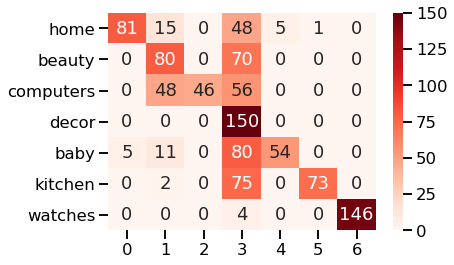

In [446]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [447]:
# ARI
ARI_TFIDF = metrics.adjusted_rand_score(y_true, y_pred)
print(ARI_TFIDF)

0.2662851201325656


In [448]:
outlier1= pd.DataFrame(X)
outlier2= pd.DataFrame(y_true)
outlier3= pd.DataFrame(y_pred)

In [449]:
outlier3.columns = ['predicted']
outlier3

,predicted
0,2
1,2
2,2
3,2
4,2
...,...
1045,2
1046,2
1047,2
1048,2


In [450]:
frames = [outlier1, outlier2, outlier3]
result = pd.concat(frames, axis=1)

In [451]:
outliers= result[result['code']==2]

In [452]:
outliers1= outliers[outliers['predicted']==0]

In [453]:
outliers2= outliers[outliers['predicted']==2]

In [454]:
# Save labels 
LABELS_TFIDF = y_pred_transform

In [455]:
X

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel bath ...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigment polyvinyl fil...
1048    buy wallmantra medium vinyl sticker sticker r ...
1049    buy uberlyfe large vinyl sticker r online uber...
Name: description_processed, Length: 1050, dtype: object

In [456]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([('vect', vectorizer),
                         ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_tfidf = pipeline_viz.fit_transform(X)

In [457]:
# create df
df_tsne_tfidf = pd.DataFrame(X_tsne_tfidf[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_tfidf['product_category'] = df['code']
df_tsne_tfidf['category'] = y_true
#df_tsne_tfidf['clusters_kmeans']= LABELS_TFIDF
df_tsne_tfidf['clusters_nmf']= LABELS_TFIDF

In [458]:
# Set colors for plots
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]

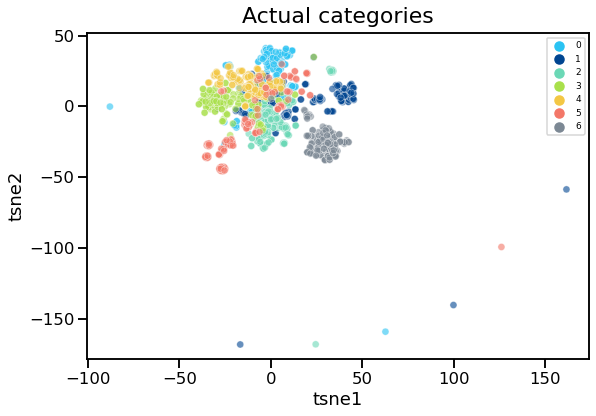

In [459]:
dftsne = df_tsne_tfidf.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [465]:
punanen= dftsne[dftsne['tsne2']<-40]
punanen

,tsne1,tsne2,product_category,category,clusters_nmf
793,62.622852,-159.122437,0,0,3
1013,-16.699617,-168.167313,1,1,3
1006,99.774452,-140.316681,1,1,3
77,161.494568,-58.633408,1,1,3
87,24.509211,-168.050827,2,2,3
183,-26.025860,-45.789703,5,5,5
186,-26.461512,-44.138523,5,5,5
160,-24.928400,-44.507854,5,5,5
164,-25.759321,-44.356907,5,5,5
179,-26.384647,-42.538448,5,5,5


In [471]:
print(textdf.iloc[183])

uniq_id                                     3830dda3491cd5b28ed42ae544bc44f0
crawl_timestamp                                    2015-12-01 12:40:44 +0000
product_url                http://www.flipkart.com/rockmantra-blue-water-...
product_name                     Rockmantra Blue Water Abstracts Ceramic Mug
product_category_tree      ["Kitchen & Dining >> Coffee Mugs >> Rockmantr...
pid                                                         MUGEAGGKDCJHRYBY
retail_price                                                           499.0
discounted_price                                                       199.0
image                                   3830dda3491cd5b28ed42ae544bc44f0.jpg
is_FK_Advantage_product                                                False
description                Rockmantra Blue Water Abstracts Ceramic Mug (5...
product_rating                                           No rating available
overall_rating                                           No rating available

In [478]:
harmaa= dftsne[dftsne['tsne2']<-20]
harmaa=harmaa[harmaa['tsne1']>40]
harmaa

,tsne1,tsne2,product_category,category,clusters_nmf
793,62.622852,-159.122437,0,0,3
1006,99.774452,-140.316681,1,1,3
77,161.494568,-58.633408,1,1,3
244,125.976593,-99.308434,5,5,3
10,41.479015,-24.020296,6,6,6
780,42.311962,-25.206745,6,6,6
781,40.295982,-25.445595,6,6,6
782,40.117542,-26.407757,6,6,6
786,40.295982,-25.445595,6,6,6
787,40.295982,-25.445595,6,6,6


In [479]:
print(textdf.iloc[782])

uniq_id                                     30305ade337a4dde171afb90141bcaaa
crawl_timestamp                                    2015-12-12 11:46:53 +0000
product_url                http://www.flipkart.com/perucci-pc-122-pc-126-...
product_name               Perucci Pc-122 & Pc-126 Decker Analog Watch  -...
product_category_tree      ["Watches >> Wrist Watches >> Perucci Wrist Wa...
pid                                                         WATE7DZGWYXWJHKV
retail_price                                                          2400.0
discounted_price                                                       440.0
image                                   30305ade337a4dde171afb90141bcaaa.jpg
is_FK_Advantage_product                                                False
description                Perucci Pc-122 & Pc-126 Decker Analog Watch  -...
product_rating                                           No rating available
overall_rating                                           No rating available

In [485]:
sininen= dftsne[dftsne['tsne2']>14]
sininen=sininen[sininen['tsne1']>40]
sininen

,tsne1,tsne2,product_category,category,clusters_nmf
388,44.128910,14.224606,1,1,1
382,43.373875,14.919329,1,1,1
362,43.357231,14.928273,1,1,1
314,44.008236,15.838922,1,1,3


In [486]:
print(textdf.iloc[362])

uniq_id                                     42c5c528ad7ac8ad7a4e7c31f958e25f
crawl_timestamp                                    2015-12-01 06:13:00 +0000
product_url                http://www.flipkart.com/vincent-valentine-pari...
product_name               Vincent Valentine Paris Set of New Dark & Dark...
product_category_tree      ["Beauty and Personal Care >> Fragrances >> De...
pid                                                         CAGEYUXVAKNKDUUV
retail_price                                                           360.0
discounted_price                                                       310.0
image                                   42c5c528ad7ac8ad7a4e7c31f958e25f.jpg
is_FK_Advantage_product                                                False
description                Flipkart.com: Buy Vincent Valentine Paris Set ...
product_rating                                                           4.5
overall_rating                                                           4.5

In [492]:
vihrea= dftsne[dftsne['tsne2']>0]
vihrea=vihrea[vihrea['tsne1']<-36]
vihrea

,tsne1,tsne2,product_category,category,clusters_nmf
973,-36.292877,8.611947,3,3,3
237,-37.659481,2.527044,3,3,3
228,-37.308903,3.024518,3,3,3
225,-38.062263,4.140384,3,3,3
224,-39.278172,1.472182,3,3,3
306,-37.415478,3.510662,3,3,3
436,-36.724388,8.553815,3,3,3
284,-37.028465,12.301424,3,3,3
289,-37.018982,12.286068,3,3,3
210,-39.261112,1.489291,3,3,3


In [493]:
print(textdf.iloc[224])

uniq_id                                     cc2e2bb105a5c2b2e43842886d057b81
crawl_timestamp                                    2015-12-01 12:40:44 +0000
product_url                http://www.flipkart.com/lal-haveli-traditional...
product_name               Lal Haveli Traditional Hand Crafted Beautiful ...
product_category_tree      ["Home Decor & Festive Needs >> Showpieces >> ...
pid                                                         SHIE9FMPQBGXGTTH
retail_price                                                          5000.0
discounted_price                                                      3749.0
image                                   cc2e2bb105a5c2b2e43842886d057b81.jpg
is_FK_Advantage_product                                                False
description                Buy Lal Haveli Traditional Hand Crafted Beauti...
product_rating                                           No rating available
overall_rating                                           No rating available

In [494]:
vsininen= dftsne[dftsne['tsne2']>40]
vsininen

,tsne1,tsne2,product_category,category,clusters_nmf
972,-2.785079,41.130379,0,0,0
297,-0.774460,40.690922,0,0,0
633,8.323773,40.590431,0,0,0
1014,-0.475972,41.258572,0,0,0
636,8.311721,40.675396,0,0,0


In [495]:
print(textdf.iloc[1014])

uniq_id                                     721d6fc10f52e76007c3c0405cf967c5
crawl_timestamp                                    2016-03-02 19:09:22 +0000
product_url                http://www.flipkart.com/toons-printed-baby-boy...
product_name                     Toons Printed Baby Boy's Round Neck T-Shirt
product_category_tree      ["Baby Care >> Infant Wear >> Baby Boys' Cloth...
pid                                                         TSHEGAYYMSFTSSSQ
retail_price                                                           400.0
discounted_price                                                       170.0
image                                   721d6fc10f52e76007c3c0405cf967c5.jpg
is_FK_Advantage_product                                                False
description                Key Features of Toons Printed Baby Boy's Round...
product_rating                                           No rating available
overall_rating                                           No rating available

In [514]:
keltanen= dftsne[dftsne['tsne2']>20]
keltanen=keltanen[keltanen['tsne1']<-20]
keltanen

,tsne1,tsne2,product_category,category,clusters_nmf
971,-24.578632,28.995657,0,0,3
970,-22.586927,29.447119,0,0,3
968,-24.578409,28.996029,0,0,3
967,-22.059980,28.231516,0,0,3
1037,-30.109930,22.571152,4,4,3
1017,-31.008572,22.257456,4,4,3
1033,-30.949341,21.336716,4,4,3
1029,-30.630796,21.849674,4,4,3
1027,-29.840193,22.493824,4,4,3
1026,-30.403242,22.888889,4,4,3


In [515]:
print(textdf.iloc[1017])


uniq_id                                     4748b7ea0e01cffa561f1a7a7a432813
crawl_timestamp                                    2016-03-03 06:06:42 +0000
product_url                http://www.flipkart.com/aroma-comfort-polyeste...
product_name               Aroma Comfort Polyester Cream Self Design Eyel...
product_category_tree      ["Home Furnishing >> Curtains & Accessories >>...
pid                                                         CRNEG72V5KJHHUZ7
retail_price                                                           999.0
discounted_price                                                       899.0
image                                   4748b7ea0e01cffa561f1a7a7a432813.jpg
is_FK_Advantage_product                                                False
description                Key Features of Aroma Comfort Polyester Cream ...
product_rating                                           No rating available
overall_rating                                           No rating available

In [516]:
turkoosi= dftsne[dftsne['tsne2']>20]
turkoosi=turkoosi[turkoosi['tsne1']>30]
turkoosi

,tsne1,tsne2,product_category,category,clusters_nmf
639,31.978359,26.467730,2,2,2
1036,32.561596,24.941196,2,2,2
1035,33.800930,24.103512,2,2,2
1034,32.969532,25.488661,2,2,2
1032,34.219589,25.012318,2,2,2
1028,33.209908,24.507084,2,2,2
1025,32.827877,24.013281,2,2,2
1021,33.417492,25.221140,2,2,2
1019,33.636917,25.794641,2,2,2
1018,33.634277,24.780582,2,2,2


In [517]:
print(textdf.iloc[1032])

uniq_id                                     b5834f1e97c74d2833dbcb09a3f27926
crawl_timestamp                                    2016-03-03 06:06:42 +0000
product_url                http://www.flipkart.com/print-shapes-mary-max-...
product_name               PRINT SHAPES mary and max cartoon Laptop Skin ...
product_category_tree      ["Computers >> Laptop Accessories >> Computer ...
pid                                                         LACEGEZDHWHZ7Z4W
retail_price                                                           999.0
discounted_price                                                       329.0
image                                   b5834f1e97c74d2833dbcb09a3f27926.jpg
is_FK_Advantage_product                                                False
description                Key Features of PRINT SHAPES mary and max cart...
product_rating                                           No rating available
overall_rating                                           No rating available

In [460]:
dftsne2= dftsne[dftsne['tsne2']>-50]

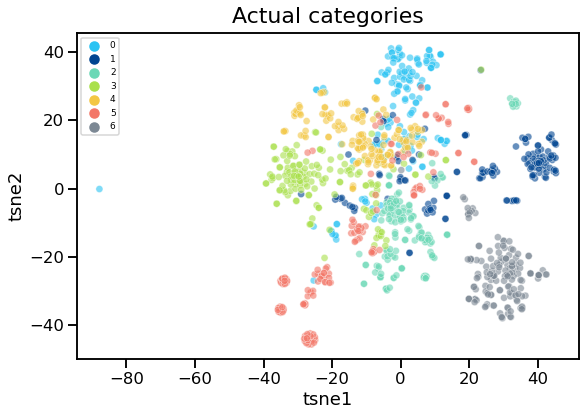

In [461]:
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne2,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

## Word2vec

In [518]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from time import time

In [519]:
# Pre-processing
tokenizer = nltk.RegexpTokenizer(r'\w+')
df['tokens']= df['description_processed'].apply(lambda x : tokenizer.tokenize(x))
sentences = df['tokens']

In [520]:
df

,description,category0,category1,description_processed,code,tokens
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...,4,"[key, feature, elegance, polyester, multicolor..."
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...,0,"[specification, sathiyas, cotton, bath, towel,..."
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...,0,"[key, feature, eurospa, cotton, terry, face, t..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...,4,"[key, feature, santosh, royal, fashion, cotton..."
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...,4,"[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...,0,"[oren, empower, extra, large, self, adhesive, ..."
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...,0,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...,0,"[buy, uberlyfe, extra, large, pigment, polyvin..."
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...,0,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [521]:
w2v_model = Word2Vec(min_count=1,
                     window=4,
                     workers= 4)

In [522]:
# Build vocabulary table
t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [523]:
# Train mode;
t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.02 mins


In [524]:
# For eqch phrase we make a sum of vectors 
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(sentences, w2v_model)
wv_train_feat.shape

(1050, 100)

In [525]:
X_wv_train_feat, df_wv_train_feat = pca99(wv_train_feat)

dim before PCA :  (1050, 100)
dim after PCA :  (1050, 23)


In [526]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["kitchen"])

[('suttle', 0.8619847893714905),
 ('vibrancy', 0.827806830406189),
 ('scissor', 0.8123700022697449),
 ('cutlery', 0.7941209673881531),
 ('multifunction', 0.7919292449951172),
 ('add', 0.7804509997367859),
 ('addition', 0.7736437916755676),
 ('bd', 0.7734395265579224),
 ('wardrobe', 0.7639333009719849),
 ('fab', 0.7629700899124146)]

In [527]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["baby"])

[('dongli', 0.8729158043861389),
 ('girl', 0.8728197813034058),
 ('rute', 0.8705917596817017),
 ('yk', 0.8667352199554443),
 ('empire', 0.8617977499961853),
 ('strip', 0.8606576323509216),
 ('romper', 0.8568981885910034),
 ('sleepsuit', 0.8549520373344421),
 ('bodysuit', 0.8539076447486877),
 ('feetz', 0.8525410294532776)]

In [528]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["computer"])

[('vacuum', 0.9463503360748291),
 ('beloved', 0.8888146877288818),
 ('dust', 0.8711302280426025),
 ('xyz', 0.8656039834022522),
 ('vent', 0.8600109219551086),
 ('desktop', 0.8586738705635071),
 ('keyboard', 0.8562708497047424),
 ('port', 0.853988766670227),
 ('device', 0.852304220199585),
 ('crevice', 0.8518965840339661)]

In [529]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["decor"])

[('decorate', 0.8755817413330078),
 ('cor', 0.8510769009590149),
 ('home', 0.843045175075531),
 ('grace', 0.8302411437034607),
 ('pride', 0.8298981785774231),
 ('creativity', 0.8171393871307373),
 ('blind', 0.8101940155029297),
 ('sculpture', 0.8035750389099121),
 ('spunk', 0.7916641235351562),
 ('flazee', 0.7898234724998474)]

In [530]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["watch"])

[('sl', 0.9402467012405396),
 ('ym', 0.9261215925216675),
 ('j', 0.9172953963279724),
 ('ba', 0.9103659391403198),
 ('prsmd', 0.9072218537330627),
 ('men', 0.9029959440231323),
 ('yl', 0.8984755277633667),
 ('analog', 0.8979883790016174),
 ('lmgi', 0.8978195786476135),
 ('bw', 0.8969293236732483)]

In [531]:
# make clusters
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(X_wv_train_feat)
y_pred = kmeans.labels_

In [532]:
LABELS_W2V = y_pred_transform

In [533]:
df12= pd.DataFrame(kmeans.labels_, columns = ['Column_A'])
df12

,Column_A
0,5
1,1
2,5
3,5
4,5
...,...
1045,5
1046,5
1047,0
1048,0


In [534]:
df23 = df12["Column_A"]
df23

0       5
1       1
2       5
3       5
4       5
       ..
1045    5
1046    5
1047    0
1048    0
1049    0
Name: Column_A, Length: 1050, dtype: int32

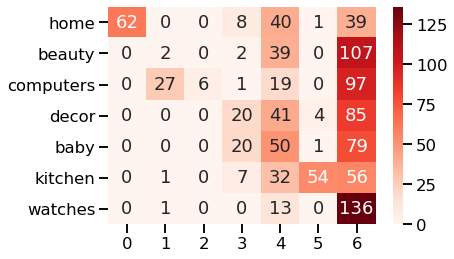

In [535]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, df23)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = df23.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [536]:
# ARI
ARI_W2V = metrics.adjusted_rand_score(y_true, y_pred)
print(ARI_W2V)

0.058583318059462305


## Universal Sentence Encoder

In [686]:
import tensorflow_hub as hub

In [687]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [688]:
embeddings = embed(data)

In [689]:
print(embeddings)

tf.Tensor(
[[-0.05313345 -0.05335029  0.01701597 ...  0.04609688  0.0389507
  -0.0354351 ]
 [-0.04505126 -0.04864699 -0.00403906 ...  0.02970058  0.03135629
   0.01626785]
 [-0.05374872 -0.05019253 -0.01644756 ...  0.04867152 -0.03173299
  -0.04991819]
 ...
 [-0.00479776 -0.05075457  0.01847761 ... -0.05316433  0.04329825
  -0.05382344]
 [-0.02601579 -0.05226224  0.03394312 ...  0.02035107 -0.01238511
  -0.00977906]
 [-0.04655476 -0.04521005  0.01941035 ...  0.02409776 -0.00889808
  -0.00372402]], shape=(1050, 512), dtype=float32)


In [691]:
X = embeddings
y_true = df['code']

In [690]:
y_true=list(y_true) 

In [692]:
# create pipeline (updated with best params from gridsearch below)
kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100, init='k-means++')

pipeline = Pipeline([('kmeans', kmeans)])

In [693]:
# gridsearch
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

# make scorer
score = make_scorer(metrics.adjusted_rand_score)

# Set grid search params
grid_params = [{
                'kmeans__random_state': (0, 20, 40, 60),
                'kmeans__init': ('k-means++', 'random'),
                'kmeans__max_iter': [100, 120, 150]
                }]

# Construct grid search
gs_USE = GridSearchCV(estimator=pipeline,
                        param_grid=grid_params,
                        scoring=score,
                        cv=[(slice(None), slice(None))])

gs_USE.fit(X, y_true)
print('Best params are : %s' % gs_USE.best_params_)

# Best training data accuracy
print('Best training score: %.3f' % gs_USE.best_score_)

# Predict on test data with best params
y_pred = gs_USE.predict(X)

Best params are : {'kmeans__init': 'random', 'kmeans__max_iter': 100, 'kmeans__random_state': 60}
Best training score: 0.344


In [694]:
# fit best model
model = pipeline.fit(X)
y_pred = pd.Series(pipeline.predict(X))

In [695]:
categories

['home', 'beauty', 'computers', 'decor', 'baby', 'kitchen', 'watches']

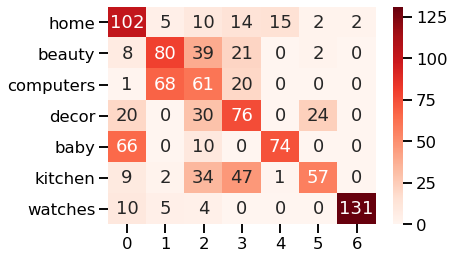

In [696]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [697]:
# ARI
ARI_USE = metrics.adjusted_rand_score(y_true, y_pred)
print(ARI_USE)

0.31783515912696503


In [698]:
# Save labels 
LABELS_USE = y_pred_transform

In [699]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([
                         
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_use = pipeline_viz.fit_transform(X)

In [700]:
# create df
df_tsne_use = pd.DataFrame(X_tsne_use[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_use['product_category'] = df['code']
df_tsne_use['category'] = y_true
df_tsne_use['clusters_nmf']= LABELS_USE

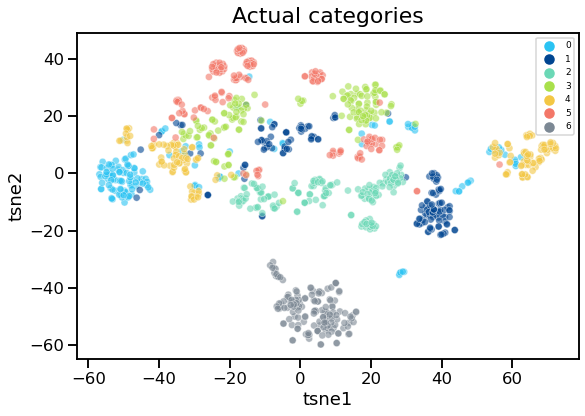

In [701]:
dftsneuse = df_tsne_use.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsneuse,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [702]:
print(ARI_BOW)
print(ARI_TFIDF)
print(ARI_W2V)
print(ARI_USE)

0.28034314033947594
0.2662851201325656
0.058583318059462305
0.31783515912696503


## Image classification

In [188]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [189]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [190]:
textdf=pd.read_csv('/Users/riina//Downloads/flipkart_com-ecommerce_sample_1050.csv')
textdf['product_category_tree'] = textdf['product_category_tree'].astype('string')
textdf[['category','a','b']] = textdf['product_category_tree'].str.split('>>',2,expand=True)
textdf["category"]= textdf["category"].str[2:]
textdf["category"] = textdf["category"].str[:-1]

In [191]:
text=textdf[['image','category']]
text=text.sort_values('category')
text=text.reset_index(drop=True)
text

,image,category
0,f2f027ad6a6df617c9f125173da71e44.jpg,Baby Care
1,4e03d4e81e6a876f512536f6a57c053e.jpg,Baby Care
2,44218245b37581c534038cc27d081093.jpg,Baby Care
3,967d91e162afb44a67c0281f71766e4d.jpg,Baby Care
4,4b500e244f11a45f5171bd3665413044.jpg,Baby Care
...,...,...
1045,8d1abb3504a19ab41e7d8b8b1d5dd839.jpg,Watches
1046,c7d81193e868b50355412ced7a67f8f3.jpg,Watches
1047,66b75f053cb7626f49f1a9bffe77b451.jpg,Watches
1048,2541b59d54a3a9f2681c0049f7ddd85c.jpg,Watches


In [192]:
text.category = pd.Categorical(text.category)
text['code'] = text.category.cat.codes

In [193]:
textdf

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,a,b
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains >> Elegance Polyester Multicolor Abs...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Sathiyas Baby Bath Towels...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Eurospa Baby Bath Towels ...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets >> SANTOSH ROYAL FASHION Bedsheets ...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets >> Jaipur Print Bedsheets >> Jaipur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Oren Empower Stickers""]"
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Wallmantra Stickers""]"
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-

In [194]:
finaldf=text[['image','category']]

In [195]:
finaldf.to_csv('imagefinaldf.csv')

In [196]:
img_directory= os.path.join(os.getcwd(),r"/Users/riina/Downloads/Flipkart/Images")

In [197]:
path = r"/Users/riina/Downloads/Flipkart/Images/"
from os import listdir
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1052


In [198]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

Baby Care


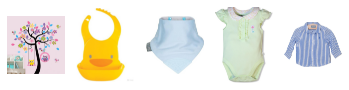

Beauty and Personal Care


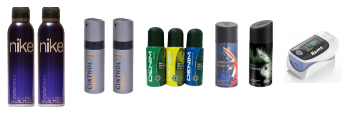

Computers


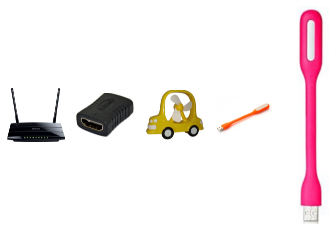

Home Decor & Festive Needs


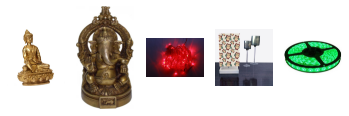

Home Furnishing


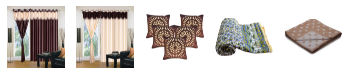

Kitchen & Dining


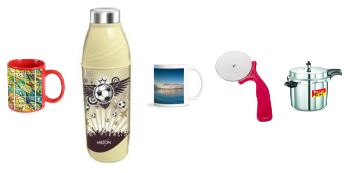

Watches


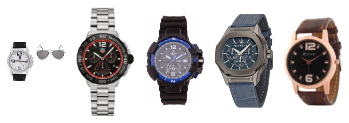

In [199]:
df_img= text.loc[:,["image","category","code"]]

from matplotlib.image import imread
import matplotlib.pyplot as plt

for cat in df_img.category.unique() :
    df_cat = df_img[df_img.category == cat]
    print(cat)
    print("================")
    for i in range(5):
        plt.subplot(1,5,i+1)
        filename = os.path.join(img_directory,df_cat.iloc[i,0])
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

Baby Care


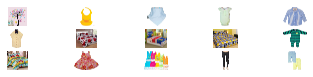

Beauty and Personal Care


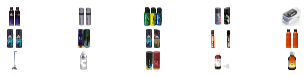

Computers


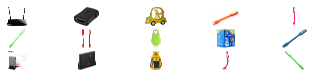

Home Decor & Festive Needs


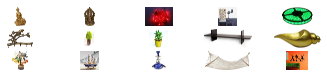

Home Furnishing


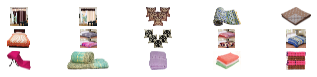

Kitchen & Dining


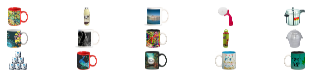

Watches


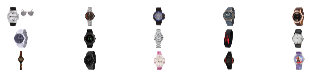

In [200]:
df_img= text.loc[:,["image","category","code"]]

from matplotlib.image import imread
import matplotlib.pyplot as plt

for cat in df_img.category.unique() :
    df_cat = df_img[df_img.category == cat]
    print(cat)
    print("================")
    for i in range(15):
        plt.subplot(10,5,i+1)
        filename = os.path.join(img_directory,df_cat.iloc[i,0])
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

## Sift

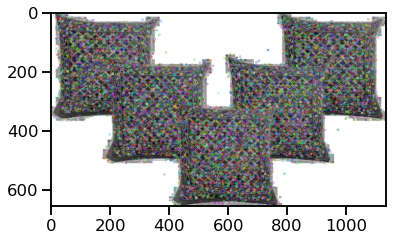

Descripteurs :  (11092, 128)

[[  1.   1.   1. ...   2.   7.   5.]
 [106. 102.   1. ...   0.   0.   0.]
 [ 32.   0.   0. ...   0.   0.   0.]
 ...
 [  1.   7.   7. ...  17.   7.   5.]
 [ 91.  15.   3. ...   6.   5.   0.]
 [  0.   0.   0. ...   2.   1.   5.]]


In [201]:
import cv2
sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

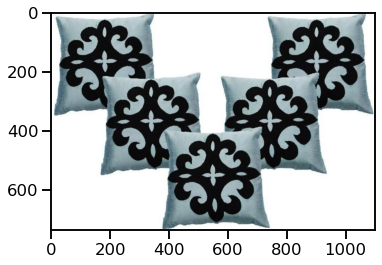

In [202]:
before=cv2.imread("/Users/riina/Downloads/Flipkart/Images/e56ffc10078972b5f4e7302383db8d72.jpg")
plt.imshow(before)
plt.show()

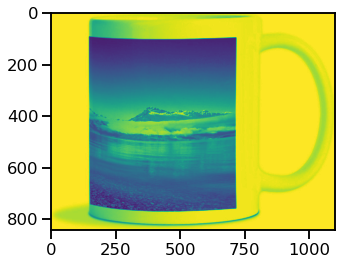

In [205]:
sift = cv2.SIFT_create()
image2=cv2.imread("/Users/riina/Downloads/Flipkart/Images/3830dda3491cd5b28ed42ae544bc44f0.jpg",0)
#image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
plt.imshow(image2)
plt.show()

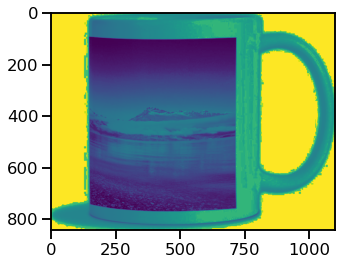

In [206]:
image2 = cv2.equalizeHist(image2)   
plt.imshow(image2)
plt.show()

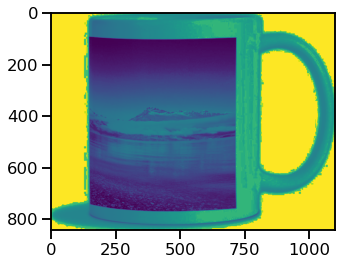

In [207]:
image2 = cv2.normalize(image2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
plt.imshow(image2)
plt.show()

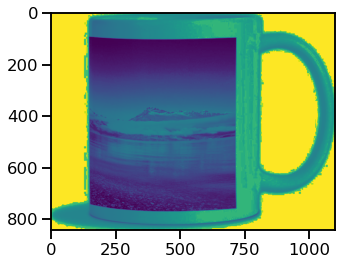

In [208]:
kp, des = sift.detectAndCompute(image2, None)
plt.imshow(image2)
plt.show()

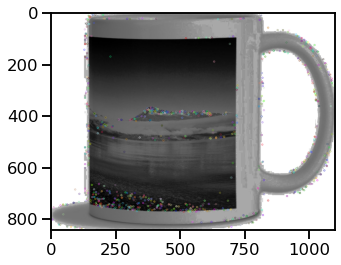

Descripteurs :  (790, 128)

[[104.   2.   0. ...   0.   0.   0.]
 [ 10.  31.   5. ...   0.   0.   0.]
 [ 18.  43.  10. ...   0.   0.   0.]
 ...
 [ 32. 134.   2. ...   0.   0.  25.]
 [  1.   0.   0. ...   6.   9.   2.]
 [123.  27.   0. ...   0.   0.   1.]]


In [209]:
img=cv2.drawKeypoints(image2,kp,image2)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [76]:
dict_cat = {'home furnishing': 'home','beauty and personal care': 'beauty', 'computers': 'computers', 'home decor festive needs': 'decor',
            'baby care': 'baby','kitchen dining': 'kitchen','watches': 'watches'}
categories = list(dict_cat.values())

In [324]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           560.44 secondes


In [325]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=7, init='k-means++', random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             3.47 secondes


In [326]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.49 secondes


In [327]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 7)
Dimensions dataset après réduction PCA :  (1050, 5)


In [328]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = text["code"]
print(df_tsne.shape)

(1050, 3)


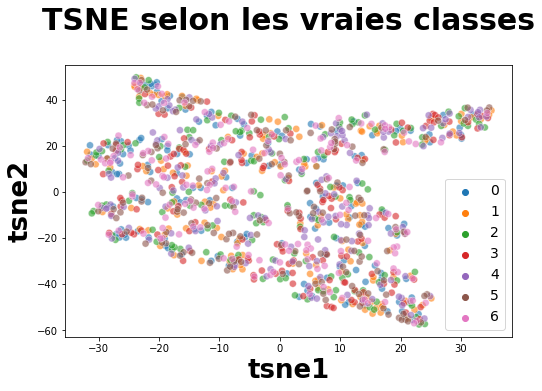

In [329]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [330]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer

In [331]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


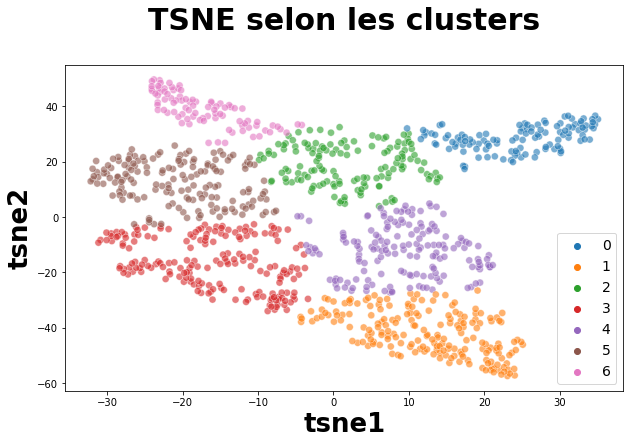

In [332]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = text["code"]


In [333]:
df_tsne

,tsne1,tsne2,class,cluster
0,6.080350,11.054125,0,2
1,-4.674922,15.784184,0,2
2,10.442939,2.814116,0,4
3,5.839875,-15.864815,0,4
4,-1.837589,11.356730,0,2
...,...,...,...,...
1045,4.936394,-44.227657,6,1
1046,14.605865,-21.218170,6,4
1047,-19.571888,42.540531,6,6
1048,-26.695124,-16.792860,6,3


In [334]:
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.00028294588463466944


In [335]:
fmatrix=df_tsne[['class','cluster']]

In [336]:
fmatrix

,class,cluster
0,0,2
1,0,2
2,0,4
3,0,4
4,0,2
...,...,...
1045,6,1
1046,6,4
1047,6,6
1048,6,3


In [337]:
testy = df_tsne["class"]

In [338]:
testx=df_tsne["cluster"]

In [339]:
df12= pd.DataFrame(cls.labels_, columns = ['Column_A'])
df12

,Column_A
0,2
1,2
2,4
3,4
4,2
...,...
1045,1
1046,4
1047,6
1048,3


In [340]:
df23 = df12["Column_A"]
df23

0       2
1       2
2       4
3       4
4       2
       ..
1045    1
1046    4
1047    6
1048    3
1049    2
Name: Column_A, Length: 1050, dtype: int32

In [341]:
testi=cls.labels_
testi

array([2, 2, 4, ..., 6, 3, 2], dtype=int32)

In [342]:
def conf_mat_transform(conf_mat) :
    '''function to re-assign clusters by maximizing the diagonal of the confusion matrix'''

    # Inverse the number of items per categories (in order to use following function)
    conf_mat_temp = 1 /(conf_mat + 0.001)
    
    # apply function to get the combination of columns to minimize the diagonal 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    # transform matrix according to new columns combination
    conf_mat_transform = conf_mat[:, col_ind]
    
    # reverse liste of column index
    corresp = col_ind.tolist()
    
    return corresp, conf_mat_transform

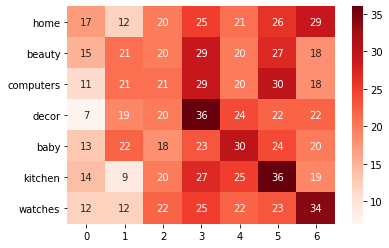

In [343]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(labels,df23)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = df23.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [345]:
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.00028294588463466944


## VGG16

In [78]:
import pandas as pd
import numpy as np
import collections

import os

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## image preprocessing
import cv2
import albumentations as A
#import albumentations as A
import imageio
from PIL import Image, ImageOps, ImageFilter
import matplotlib.image as mpimg
from keras.preprocessing import image

## for metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## for clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## for data augmentation
#import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## for CNN
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import Sequence

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
import tensorflow as tf

from tqdm import tqdm
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'

In [79]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## <span class="bg-danger">1. Main Functions <span>

In [80]:
def path(image):
    
    image = r"/Users/riina/Downloads/Flipkart/Images/"+ image
    
    return image

In [81]:
def extract(image):
   
    im = Image.open(image)
    file_dir=os.path.split(image)
    
    im.save(r"/Users/riina/Downloads/Flipkart/Images/"+file_dir[1])
    
    return r"/Users/riina/Downloads/Flipkart/Images/"+file_dir[1]

In [82]:
def redimension(image):
    size = 224, 224
    # On charge l'image d'origine
    im = Image.open(image)
    file_dir=os.path.split(image)
    #L'un des côté de l'image fait 224, on garde le ratio original(pas de déformation)
    im.thumbnail(size, Image.ANTIALIAS)
    # On enregistre dans un nouveau dossier l'image redimensionnée.
    im.save(r"/Users/riina/Downloads/Flipkart/Images/Images_redimension/"+file_dir[1])
    
    #Centrage
    im = Image.open(r"/Users/riina/Downloads/Flipkart/Images/Images_redimension/"+file_dir[1])
    width, height = im.size
    
    if height > width:
        img = Image.new('RGB', (224, 224),(255,255,255)) # white
        position_larg = int((height - width) / 2)
        img.paste(im, box=(position_larg,0))
        img.save(r"/Users/riina/Downloads/Flipkart/Images/Images_redimension/"+file_dir[1])
        
    elif width > height:
        img = Image.new('RGB', (224, 224),(255,255,255)) # white
        position_haut = int((width - height) / 2)
        img.paste(im, box=(0, position_haut))
        img.save(r"/Users/riina/Downloads/Flipkart/Images/Images_redimension/"+file_dir[1])
    
    return r"/Users/riina/Downloads/Flipkart/Images/Images_redimension/"+file_dir[1]

In [83]:
def extract_data(col):
    v = np.column_stack(df_image[col].values.tolist())
    df = pd.DataFrame(v).T
    
    return df

In [84]:
def heatconmat(y_true,y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9,6))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_pred.unique()))
    plt.show()
    print(classification_report(y_true,y_pred))

In [85]:
df = pd.read_csv('/Users/riina//Downloads/flipkart_com-ecommerce_sample_1050.csv')
df_image = df[['image','product_category_tree']]
df_image['cat_1']=df_image['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])
del df_image['product_category_tree']
df_image["image"] = df_image["image"].apply(path)
df_image["image"] = df_image["image"].apply(extract)

In [87]:
df_image["image_redimension"] = df_image["image"].apply(redimension)

In [88]:
# Modèle, extraction des features
vgg16_feature_list = []

model = VGG16(weights='imagenet', include_top=False)
model.summary()
for img_path in df_image["image"]:
    
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())
        
vgg16_feature_list_np = np.array(vgg16_feature_list)

2022-01-21 07:27:09.948157: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

2022-01-21 07:27:10.657535: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [89]:
#Extraction des données du dataframe
df_image["VGG16"] =  ""

for i in range(df_image.shape[0]):
    df_image["VGG16"][i] = vgg16_feature_list_np[i]
    
df_VGG16 = extract_data("VGG16")
print("Taille vecteurs VGG16 :", df_VGG16.shape[1])

df_image.head()

Taille vecteurs VGG16 : 25088


,image,cat_1,image_redimension,VGG16
0,/Users/riina/Downloads/Flipkart/Images/55b85ea...,Home Furnishing,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 11.147553, 0.0, 0.0, 0.0,..."
1,/Users/riina/Downloads/Flipkart/Images/7b72c92...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,/Users/riina/Downloads/Flipkart/Images/64d5d4a...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,/Users/riina/Downloads/Flipkart/Images/d4684dc...,Home Furnishing,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,/Users/riina/Downloads/Flipkart/Images/6325b68...,Home Furnishing,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [96]:
# create pipeline (updated with best params from gridsearch below)
from sklearn.pipeline import Pipeline
kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100, init='k-means++')

pipeline = Pipeline([('kmeans', kmeans)])

In [99]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [127]:
df.category0 = pd.Categorical(df.category0)

In [128]:
df['code'] = df.category0.cat.codes

In [129]:
X = df_VGG16
y_true = df['code']

In [132]:
y_true=list(y_true) 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,  Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [133]:
# gridsearch
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

# make scorer
score = make_scorer(metrics.adjusted_rand_score)

# Set grid search params
grid_params = [{
                'kmeans__random_state': (0, 20, 40, 60),
                'kmeans__init': ('k-means++', 'random'),
                'kmeans__max_iter': [100, 120, 150]
                }]

# Construct grid search
gs= GridSearchCV(estimator=pipeline,
                        param_grid=grid_params,
                        scoring=score,
                        cv=[(slice(None), slice(None))])

gs.fit(X, y_true)
print('Best params are : %s' % gs.best_params_)

# Best training data accuracy
print('Best training score: %.3f' % gs.best_score_)

# Predict on test data with best params
y_pred = gs.predict(X)

Best params are : {'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__random_state': 0}
Best training score: 0.280


In [134]:
# fit best model
model = pipeline.fit(X)
y_pred = pd.Series(pipeline.predict(X))

In [135]:
categories

['home', 'beauty', 'computers', 'decor', 'baby', 'kitchen', 'watches']

In [137]:
def conf_mat_transform(conf_mat) :
    '''function to re-assign clusters by maximizing the diagonal of the confusion matrix'''

    # Inverse the number of items per categories (in order to use following function)
    conf_mat_temp = 1 /(conf_mat + 0.001)
    
    # apply function to get the combination of columns to minimize the diagonal 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    # transform matrix according to new columns combination
    conf_mat_transform = conf_mat[:, col_ind]
    
    # reverse liste of column index
    corresp = col_ind.tolist()
    
    return corresp, conf_mat_transform

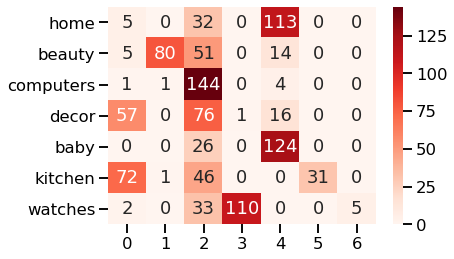

In [138]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [139]:
# ARI
ARI_VGG16 = metrics.adjusted_rand_score(y_true, y_pred)
print(ARI_VGG16)

0.2802800665591601


In [172]:
# Save labels 
VGG16 = y_pred_transform

In [173]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([
                         
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsnevgg16 = pipeline_viz.fit_transform(X)

In [174]:
df

,description,category0,category1,code
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,4
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,0
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,4
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,4
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,0
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,0
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,0
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,0


In [175]:
# create df
X_tsnevgg16 = pd.DataFrame(X_tsnevgg16[:,:2], columns=['tsne1', 'tsne2'])
X_tsnevgg16['product_category'] = df['code']
X_tsnevgg16['category'] = y_true
X_tsnevgg16['clusters_nmf']= VGG16

In [176]:
# Set colors for plots
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]

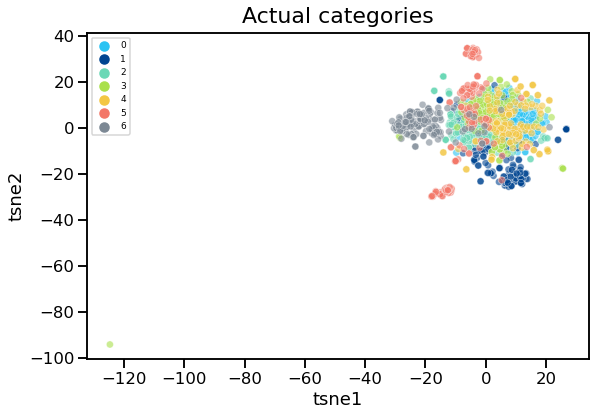

In [177]:
dftsneuse = X_tsnevgg16.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsneuse,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [179]:
dftsne12=dftsneuse[dftsneuse['tsne2']>-40]

In [181]:
dftsne13=dftsneuse[dftsneuse['tsne2']<-40]
dftsne13

,tsne1,tsne2,product_category,category,clusters_nmf
225,-124.662292,-94.230446,3,3,0


In [182]:
print(textdf.iloc[225])

uniq_id                                     67d6b4a8aa19d57740b0440365b77624
crawl_timestamp                                    2015-12-01 12:40:44 +0000
product_url                http://www.flipkart.com/lal-haveli-decorative-...
product_name               Lal Haveli Decorative Dholak Musician Showpiec...
product_category_tree      ["Home Decor & Festive Needs >> Showpieces >> ...
pid                                                         SHIEBCQZF8EQ3FSD
retail_price                                                          1450.0
discounted_price                                                      1085.0
image                                   67d6b4a8aa19d57740b0440365b77624.jpg
is_FK_Advantage_product                                                False
description                Lal Haveli Decorative Dholak Musician Showpiec...
product_rating                                           No rating available
overall_rating                                           No rating available

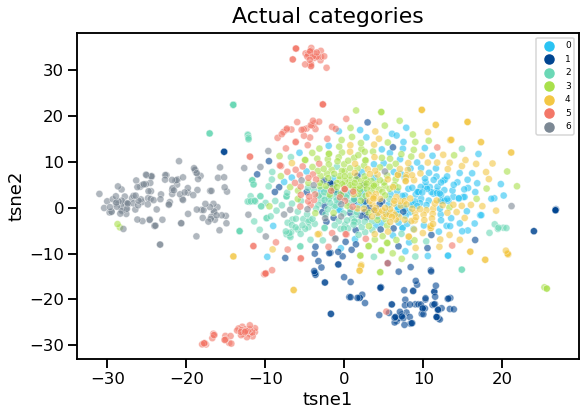

In [180]:
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne12,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

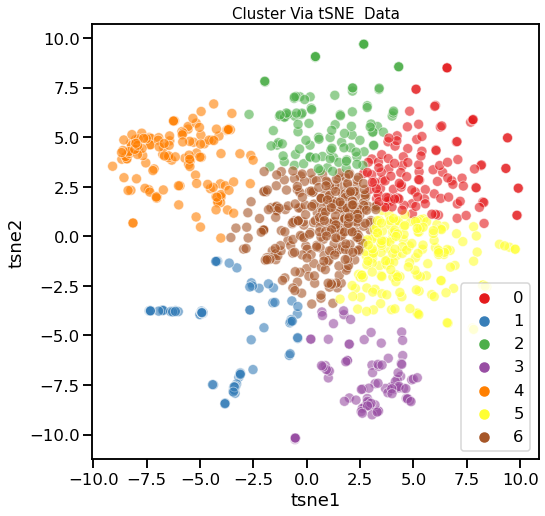

Adjusted Rand Index: 0.321


In [183]:
#Dimensions reduction Tsne
tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
tsne = tsne.fit_transform(df_VGG16)
tsne_df = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

#Clustering kmeans
kmeans = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels = kmeans.labels_
clusters = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels})], axis=1)

#Plotting
plt.figure(figsize = (8,8))
sns.scatterplot(clusters.iloc[:,0],clusters.iloc[:,1],hue=labels, palette='Set1', s=100, alpha=0.6).set_title('Cluster Via tSNE  Data', fontsize=15)
plt.legend()
plt.show()

#Metrics ARI
df_image['cluster_VGG16'] = labels
categories_true = df_image['cat_1']
categories_predict = df_image['cluster_VGG16']
from sklearn import metrics
ari_VGG16 = metrics.adjusted_rand_score(categories_true, categories_predict)
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))

In [184]:
df_image.groupby('cluster_VGG16')['cat_1'].value_counts().to_frame()

cat_1
cluster_VGG16 cat_1                            
0             Home Furnishing                49
              Home Decor & Festive Needs     36
              Baby Care                      29
              Beauty and Personal Care        5
              Kitchen & Dining                4
              Computers                       1
              Watches                         1
1             Kitchen & Dining               83
              Beauty and Personal Care       15
              Baby Care                       2
              Computers                       2
              Home Decor & Festive Needs      1
2             Kitchen & Dining               40
              Home Decor & Festive Needs     30
              Computers                      20
              Baby Care                       8
              Home Furnishing                 8
              Beauty and Personal Care        2
              Watches                         2
3             Beauty and Personal Care       91
              Kitchen & Dining                2
              Computers                       1
4             Watches                       136
              Home Decor & Festive Needs      2
              Computers                       1
5             Baby Care                      77
              Home Furnishing                73
              Computers                       9
              Home Decor & Festive Needs      9
              Beauty and Personal Care        6
6             Computers                     116
              Home Decor & Festive Needs     72
              Baby Care                      34
              Beauty and Personal Care       31
              Kitchen & Dining               21
              Home Furnishing                20
              Watches                        11


accuracy: 35.33%


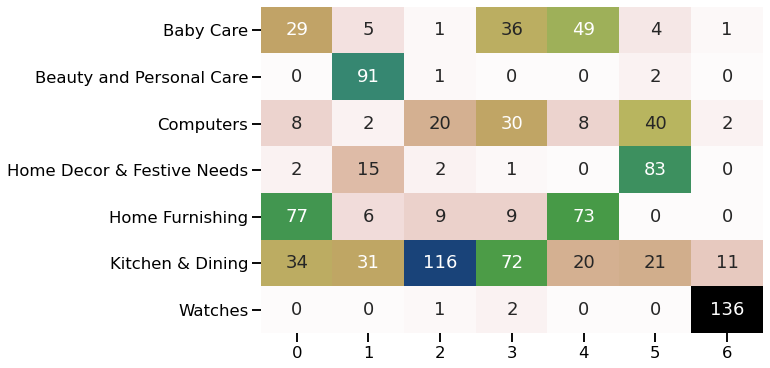

                            precision    recall  f1-score   support

                 Baby Care       0.19      0.23      0.21       125
  Beauty and Personal Care       0.61      0.97      0.75        94
                 Computers       0.13      0.18      0.15       110
Home Decor & Festive Needs       0.01      0.01      0.01       103
           Home Furnishing       0.49      0.42      0.45       174
          Kitchen & Dining       0.14      0.07      0.09       305
                   Watches       0.91      0.98      0.94       139

                  accuracy                           0.35      1050
                 macro avg       0.35      0.41      0.37      1050
              weighted avg       0.33      0.35      0.33      1050



In [185]:
#Catégories des différents clusters + Matrice de confusion
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16']
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16_label'].replace(0, 'Baby Care')
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16_label'].replace(1, 'Home Decor & Festive Needs')
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16_label'].replace(2, 'Computers')
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16_label'].replace(3, 'Beauty and Personal Care')
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16_label'].replace(4, 'Watches')
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16_label'].replace(5, 'Home Furnishing')
df_image['cluster_VGG16_label'] = df_image['cluster_VGG16_label'].replace(6, 'Kitchen & Dining')
categories_predict = df_image['cluster_VGG16_label']
categories_true = df_image['cat_1']
print('\naccuracy: {}%'.format(round(accuracy_score(categories_predict,categories_true)*100,2)))
heatconmat(categories_predict,categories_true)

In [186]:
df_image

,image,cat_1,image_redimension,VGG16,cluster_VGG16,cluster_VGG16_label
0,/Users/riina/Downloads/Flipkart/Images/55b85ea...,Home Furnishing,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 11.147553, 0.0, 0.0, 0.0,...",5,Home Furnishing
1,/Users/riina/Downloads/Flipkart/Images/7b72c92...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,Home Furnishing
2,/Users/riina/Downloads/Flipkart/Images/64d5d4a...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,Home Furnishing
3,/Users/riina/Downloads/Flipkart/Images/d4684dc...,Home Furnishing,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,Baby Care
4,/Users/riina/Downloads/Flipkart/Images/6325b68...,Home Furnishing,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,Home Furnishing
...,...,...,...,...,...,...
1045,/Users/riina/Downloads/Flipkart/Images/958f54f...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 69.95118, 0.0, ...",6,Kitchen & Dining
1046,/Users/riina/Downloads/Flipkart/Images/fd6cbcc...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,Kitchen & Dining
1047,/Users/riina/Downloads/Flipkart/Images/5912e03...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[1.8455695, 50.792404, 0.0, 0.0, 0.0, 3.981578...",2,Computers
1048,/Users/riina/Downloads/Flipkart/Images/c3edc50...,Baby Care,/Users/riina/Downloads/Flipkart/Images/Images_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,Kitchen & Dining
